In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
N = 500
xl, xr = -1, 1
h = (xr-xl)/(N+1)
D = (1/h**2)*np.diag(-2*np.ones(N),0) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)
Lam, V = np.linalg.eig(D)
ii = Lam.argsort()[::-1]
Lam = Lam[ii]
V = V[:,ii]

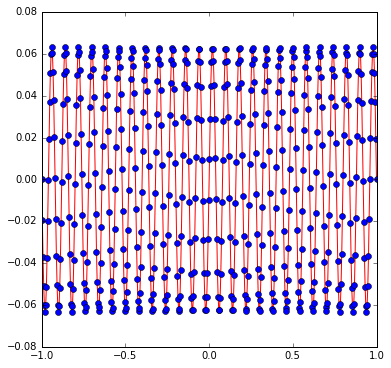

In [61]:
i = 49
x = np.linspace(xl,xr,N+2)
plt.figure(figsize=(6,6))
plt.plot(x, np.concatenate([[0],V[:,i],[0]]),'r-')
plt.plot(x, np.concatenate([[0],V[:,i],[0]]),'o')
plt.show()

In [6]:
N = 3
xl, xr = -1, 1
h = (xr-xl)/(N+1)
myLam =  np.diag(-8*np.ones(N))
D = (1/h**2)*np.diag(-2*np.ones(N),0) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1) + myLam
np.linalg.solve(D,np.zeros(N))

array([-0., -0., -0.])